# Project Update
This notebook covers the following tasks:
1. **Image Resizing**: Resize all images in a folder to a specific target size.
2. **Image Augmentation with Noise**: Apply different levels of Gaussian noise to images.

In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt

## 1. Image Resizing
This section resizes all images in a specified input folder to a target size of 512x512 pixels and saves them in an output folder.

Resized and saved: 3test.jpg


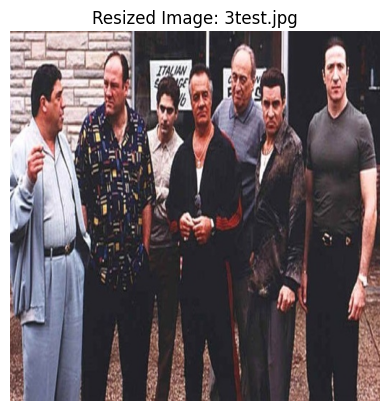

All images have been resized and saved.


In [2]:
# Parameters for image resizing
input_folder = './test_data'
output_folder = './test_data' 
target_size = (512, 512) 

# Create output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Resize all images in the input folder
for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image = cv2.imread(input_path)
        if image is not None:
            resized_image = cv2.resize(image, target_size)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_image)
            print(f'Resized and saved: {filename}')
            
            # Display the resized image
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Resized Image: {filename}')
            plt.axis('off')
            plt.show()
            break  
        else:
            print(f'Failed to load image: {filename}')
print('All images have been resized and saved.')

## 2. Image Augmentation with Noise
This section adds Gaussian noise to images at different levels and saves them in respective folders.

Saved noisy image with little_noise: ./train_data/little_noise/8.jpg


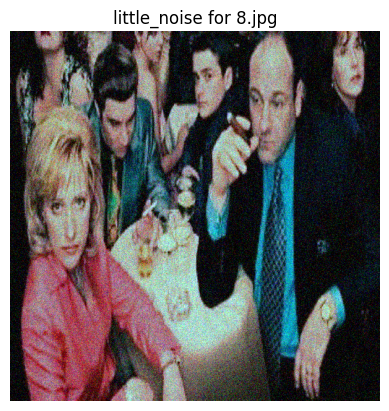

All images have been augmented with noise and saved.


In [3]:
# Parameters for noise augmentation
input_folder = './train_data'  
output_folder_base = './train_data'  

# Levels of noise to add
noise_levels = {
    'little_noise': 0.01,  # Low noise level
    'moderate_noise': 0.05,  # Moderate noise level
    'high_noise': 0.1  # High noise level
}

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, var=0.01):
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gaussian, 0, 1)
    return noisy_image

# Create output directories for each noise level
for noise_type in noise_levels:
    noise_output_folder = os.path.join(output_folder_base, noise_type)
    if not os.path.exists(noise_output_folder):
        os.makedirs(noise_output_folder)

# Apply noise augmentation to all images
for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image = cv2.imread(input_path)
        if image is not None:
            image = image / 255.0  # Normalize image
            for noise_type, noise_var in noise_levels.items():
                noisy_image = add_gaussian_noise(image, var=noise_var)
                noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)
                output_path = os.path.join(output_folder_base, noise_type, filename)
                cv2.imwrite(output_path, noisy_image_uint8)
                print(f'Saved noisy image with {noise_type}: {output_path}')
                
                # Display one of the noisy images
                plt.imshow(cv2.cvtColor(noisy_image_uint8, cv2.COLOR_BGR2RGB))
                plt.title(f'{noise_type} for {filename}')
                plt.axis('off')
                plt.show()
                break  
            break  
        else:
            print(f'Failed to load image: {filename}')
print('All images have been augmented with noise and saved.')